In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Advertising.csv', index_col = 0)

In [4]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

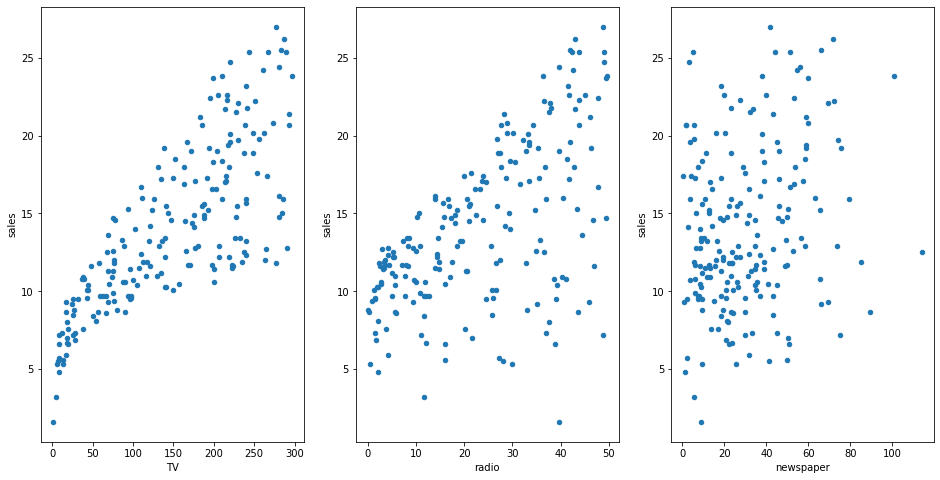

In [10]:
fig, axs = plt.subplots(1,3)
data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[0], figsize = (16,8,))
data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[1])
data.plot(kind = 'scatter', x = 'newspaper', y= 'sales', ax = axs[2])


In [11]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
#X
independant_var = data[['TV']]

#Y
target_var = data[['sales']].values

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(independant_var, target_var, test_size=0.25, random_state=6)

In [18]:
print('Xtrain shape',X_train.shape)
print('Xtest shape',X_test.shape)
print('ytrain shape',y_train.shape)
print('ytest shape',y_test.shape)

Xtrain shape (150, 1)
Xtest shape (50, 1)
ytrain shape (150, 1)
ytest shape (50, 1)


## Simple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
my_first_model = LinearRegression()

In [22]:
my_first_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# y = m * x + c

In [24]:
my_first_model.coef_

array([[0.04873499]])

In [25]:
my_first_model.intercept_

array([6.70910349])

In [26]:
predicted_value = my_first_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
mean_absolute_error(predicted_value, y_test)

2.469197684055691

In [30]:
mean_squared_error(predicted_value, y_test)

9.50319169686634

In [32]:
r2_score(predicted_value, y_test)

0.37603544848522774

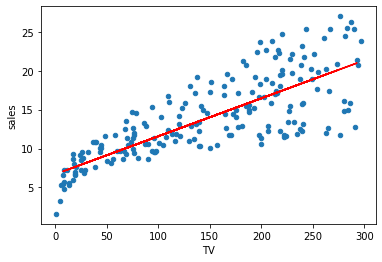

In [33]:
data.plot(kind='scatter', x = 'TV', y = 'sales')
plt.plot(X_test, predicted_value, c = 'red')

In [34]:
import statsmodels.formula.api as smf

## Ordinary Least Square


In [35]:
my_stat_model = smf.ols(formula='sales ~ TV', data = data).fit()

In [36]:
my_stat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        04:58:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

alternate hypothesis
null hypothesis

we have assume some statement to be null hypothesis.

p value 

p value < 0.05 

we reject the null hypothesis

p value > 0.05

you will accept the null hypothesis.

In [38]:
stat_predicted = my_stat_model.predict(X_test)

In [39]:
mean_absolute_error(stat_predicted, y_test)

2.4336017733585034

In [40]:
r2_score(stat_predicted, y_test)

0.3595546200565627

## Multiple Linear Regression

In [41]:
features = data[['TV', 'radio', 'newspaper']]
target = data['sales']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=.80, random_state=10)

In [45]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (160, 3)
X_test (40, 3)
y_train (160,)
y_test (40,)


In [46]:
my_multiple_lr = LinearRegression()

In [47]:
my_multiple_lr.fit(X_train, y_train)

LinearRegression()

In [48]:
multiple_pred = my_multiple_lr.predict(X_test)

In [49]:
mean_absolute_error(multiple_pred, y_test)

1.8850130310423148

In [50]:
r2_score(multiple_pred, y_test)

0.7635524766543842

## Ordinary Least Square with multiple features

In [52]:
multiple_ols = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()

In [53]:
multiple_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        06:10:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
ols_pred = multiple_ols.predict(X_test)

In [56]:
r2_score(ols_pred, y_test)

0.787353999885684

In [57]:
#78.735 with newspapaer

In [60]:
multiple_ols_without = smf.ols(formula = 'sales ~ TV + radio', data = data).fit()

In [61]:
multiple_ols_without.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           4.83e-98
Time:                        06:20:23   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
ols_without = multiple_ols_without.predict(X_test)

In [64]:
r2_score(ols_without, y_test)

0.7874437570590519

1. 100 variables
2. I trained my model on all 100 variables
3. i used OLS.
4. I got accuracy of 70%

When I checked the p values of all the 100 variables, i got to know that 20 variables were present whose p value was greater than 0.05.


Now In second part

I removed all those 20 variables.
Again when I trained the model with only 80 variables,

my accuracy increased from 70% to 85%


## Polynomial Regression

Def: A polynomial regression defines the relationship between independant variable and dependant variable as nth degree polynomial. 

### Simple Linear Regression
y = m*x + c

### Multiple Linear Regression
y = m1*x1 + m2*x2 + m3*x3 +......+mn*xn + c

### Polynomial Linear Regression
y = m1*x1 + m2*x2^2 + m3*x3^3 + $*x4^4......+mn*xn^n + c



In [65]:
from sklearn.preprocessing import PolynomialFeatures

## Polynomial With Degree 2

In [66]:
features_poly = PolynomialFeatures(degree = 2)

tv_poly = features_poly.fit_transform(features[['TV']])
radio_poly = features_poly.fit_transform(features[['radio']])
news_poly = features_poly.fit_transform(features[['newspaper']])

In [67]:
poly_features = pd.concat([pd.DataFrame(tv_poly),pd.DataFrame(radio_poly),pd.DataFrame(news_poly)],axis =1)

In [68]:
poly_features

,0,1,2,0,1,2,0,1,2
0,1.0,230.1,52946.01,1.0,37.8,1428.84,1.0,69.2,4788.64
1,1.0,44.5,1980.25,1.0,39.3,1544.49,1.0,45.1,2034.01
2,1.0,17.2,295.84,1.0,45.9,2106.81,1.0,69.3,4802.49
3,1.0,151.5,22952.25,1.0,41.3,1705.69,1.0,58.5,3422.25
4,1.0,180.8,32688.64,1.0,10.8,116.64,1.0,58.4,3410.56
...,...,...,...,...,...,...,...,...,...
195,1.0,38.2,1459.24,1.0,3.7,13.69,1.0,13.8,190.44
196,1.0,94.2,8873.64,1.0,4.9,24.01,1.0,8.1,65.61
197,1.0,177.0,31329.00,1.0,9.3,86.49,1.0,6.4,40.96
198,1.0,283.6,80428.96,1.0,42.0,1764.00,1.0,66.2,4382.44


In [70]:
37.8**2

1428.8399999999997

In [71]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, target, random_state=6)

In [72]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (150, 9)
X_test (50, 9)
y_train (150,)
y_test (50,)


In [73]:
poly_model = LinearRegression()


In [74]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [75]:
poly_pred = poly_model.predict(X_test)

In [76]:
r2_score(poly_pred,y_test)

0.9203949385893867

In [77]:
mean_absolute_error(poly_pred, y_test)

0.991274151067495

## Polynomial with degree 3

In [105]:
features_poly = PolynomialFeatures(degree = 5)

tv_poly = features_poly.fit_transform(features[['TV']])
radio_poly = features_poly.fit_transform(features[['radio']])
news_poly = features_poly.fit_transform(features[['newspaper']])

In [106]:
poly5_features = pd.concat([pd.DataFrame(tv_poly),pd.DataFrame(radio_poly),pd.DataFrame(news_poly)],axis =1)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(poly5_features, target, random_state=6)

In [108]:
poly5_model = LinearRegression()


In [109]:
poly5_model.fit(X_train, y_train)


LinearRegression()

In [110]:
poly5_pred = poly5_model.predict(X_test)

In [111]:
r2_score(poly5_pred,y_test)

0.8705086607551789